In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path

import numpy as np
from scipy.spatial.transform import Rotation
from matplotlib import pyplot as plt

from ggcnn_grasp_planner_pckg.borrowed.datasets import YCBSimulationData
from ggcnn_grasp_planner_pckg.borrowed.postprocessing import World2ImgCoordConverter
from ggcnn_grasp_planner_pckg.borrowed import visualization as vis
from ggcnn_grasp_planner_pckg.ggcnn_grasp_planner import ggcnn_get_grasp

/home/moritz/mambaforge/envs/ggcnn/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = YCBSimulationData(
    Path("/home/moritz/Documents/ycb_sim_data_1")
)

In [3]:
sample = dataset[9]

print(sample.name)

010_banana


In [4]:
grasps = ggcnn_get_grasp(
    sample.depth,
    sample.cam_intrinsics,
    sample.cam_pos,
    Rotation.from_matrix(sample.cam_rot).as_quat()[[3, 0, 1, 2]],
    50,
    sample.segmentation,
)

2D GRASP Center: (164, 106), Angle: 0.8120808601379395, Depth 0.9879159331321716
UNCROPPED 2D GRASP Center: (254, 276)
6D GRASP: position: [0.47612952 0.07750486 0.01208407], orientation: [ 5.62536578e-17  9.18691951e-01 -3.94974809e-01 -2.41852318e-17]


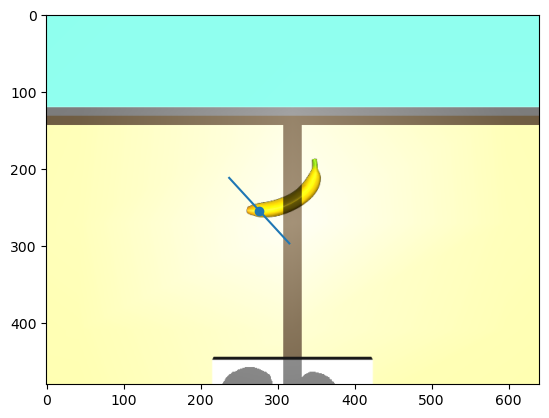

In [5]:
fig, ax = plt.subplots()

vis.world_grasps_ax(
    ax,
    sample.rgb,
    grasps[0].position,
    grasps[0].orientation,
    sample.cam_intrinsics,
    sample.cam_rot,
    sample.cam_pos,
)

plt.show()

In [ ]:
for i in range(50):
    sample = dataset[i]
    grasps = ggcnn_get_grasp(
        sample.depth,
        sample.cam_intrinsics,
        sample.cam_pos,
        Rotation.from_matrix(sample.cam_rot).as_quat()[[3, 0, 1, 2]],
        50,
        sample.segmentation,
    )

    fig, ax = plt.subplots()

    vis.world_grasps_ax(
        ax,
        sample.rgb,
        grasps[0].position,
        grasps[0].orientation,
        sample.cam_intrinsics,
        sample.cam_rot,
        sample.cam_pos,
    )

    plt.show()